In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Housing_Price_data_set.csv')
data['num_driveway']=data.driveway.map({'yes':1,'no':0})
data['num_recroom']=data.recroom.map({'yes':1,'no':0})
data['num_fullbase']=data.fullbase.map({'yes':1,'no':0})
data['num_gashw']=data.gashw.map({'yes':1,'no':0})
data['num_airco']=data.airco.map({'yes':1,'no':0})
data['num_prefarea']=data.prefarea.map({'yes':1,'no':0})
X=data[['lotsize','bedrooms','bathrms','stories','num_driveway','num_recroom','num_fullbase','num_gashw','num_airco','garagepl','num_prefarea']].values
Y=data[['price']].values
print(X[0])
#normalising the features
X=(X-np.mean(X))/np.std(X)
print(X)
print(Y.shape)


[5850    3    1    2    1    0    1    0    0    1    0]
[[ 3.32566332 -0.28800578 -0.28924186 ... -0.2898599  -0.28924186
  -0.2898599 ]
 [ 2.18229273 -0.28862382 -0.28924186 ... -0.2898599  -0.2898599
  -0.2898599 ]
 [ 1.60133687 -0.28800578 -0.28924186 ... -0.2898599  -0.2898599
  -0.2898599 ]
 ...
 [ 3.41836905 -0.28800578 -0.28862382 ... -0.28924186 -0.28924186
  -0.2898599 ]
 [ 3.41836905 -0.28800578 -0.28862382 ... -0.28924186 -0.28924186
  -0.2898599 ]
 [ 3.41836905 -0.28800578 -0.28924186 ... -0.28924186 -0.28924186
  -0.2898599 ]]
(546, 1)


In [16]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

theta = np.matrix(np.zeros(12))
print(theta)

#set gradient parameters
alpha = 0.0001
iters = 10000

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


parameters after gradient descent= [[ 8702.95760851 16565.71240751 -2503.96904258 -2512.98833016
  -2508.28447877 -2517.67076393 -2520.86062897 -2519.69139449
  -2522.07652717 -2518.99917359 -2517.60325566 -2520.47525206]]


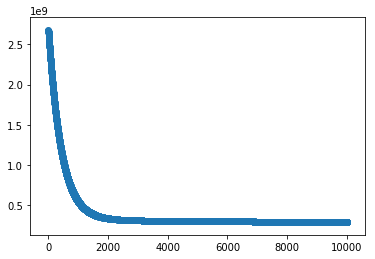

In [21]:
var=100
def gradientDescent(X,Y,theta,iters,alpha):
    cost=[]
    xTrans=X.transpose()
    for i in range(0,iters):
        hypothesis=X*theta.T
        loss=hypothesis-Y
        cost.append(np.sum(np.power(loss,2))/(2*len(X)))
        #if i>0:
            #print("iteration=",i,"| cost=",cost[i])
        gradient=(loss.T*X)/len(X)
        theta=theta-(alpha*(gradient+var/len(X)*theta))
    return theta,cost

g,cost=gradientDescent(X,Y,theta,iters,alpha)
print("parameters after gradient descent=",g)
it=np.arange(0,iters)
plt.plot(it,np.array(cost))
plt.scatter(it,np.array(cost))
#plt.ylim([3.0,4.0])
plt.show()

